MÔ TẢ
ESC-50 là một tập dữ liệu âm thanh được sử dụng phổ biến trong lĩnh vực xử lý ngôn ngữ tự nhiên và học sâu. Tập dữ liệu này bao gồm 50 loại âm thanh khác nhau, mỗi loại có 40 mẫu, cho tổng cộng 2000 mẫu âm thanh. Các loại âm thanh này bao gồm các âm thanh động vật, âm thanh phương tiện, âm thanh nhạc cụ, âm thanh các cuộc gọi...vv.

Mỗi mẫu âm thanh trong tập dữ liệu ESC-50 được ghi âm với tần số lấy mẫu 44.1kHz và có thời lượng 5 giây. Tên của tập dữ liệu này được đặt theo cách viết tắt của "Environmental Sound Classification with Convolutional Neural Networks" - một bài báo khoa học công bố kết quả đầu tiên của việc áp dụng mô hình CNN (Convolutional Neural Network) để phân loại các âm thanh trong tập dữ liệu này.

read CSV

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

esc50_path = 'D:/projectAI/sound-cls/dataset/meta/esc50.csv'
data = pd.read_csv(esc50_path)
class_names = data["category"].unique()
# In thông tin về dataframe
print(data.head())


            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


5 dòng đầu trong file esc50.csv

In [3]:
print('Số lượng bản ghi:', len(data))
print('Các trường dữ liệu:', list(data.columns))

Số lượng bản ghi: 2000
Các trường dữ liệu: ['filename', 'fold', 'target', 'category', 'esc10', 'src_file', 'take']


trong file esc50.csv có các trường dữ liệu 
+filename: tên audio
+fold: chỉ file audio đang thuộc mẫu số bao nhiêu ở esc50 thì data chia ra làm 5 mẫu , mỗi mẫu đều có số lượng audio là bằng nhau và bằng 400
+target:Nhãn lớp của tệp âm thanh, trong khoảng từ 0 đến 49, tương ứng với 50 lớp âm thanh khác nhau.
+category:Tên của lớp âm thanh tương ứng với nhãn lớp
+esc10: xem audio đó có thuộc data esc10 hay không
+src_file: tên file audio gốc
+take: file này thuộc nguồn nào

In [4]:
class_counts = data.groupby('category').size().reset_index(name='counts')

# Hiển thị bảng
print(class_counts)

            category  counts
0           airplane      40
1          breathing      40
2     brushing_teeth      40
3        can_opening      40
4           car_horn      40
5                cat      40
6           chainsaw      40
7     chirping_birds      40
8       church_bells      40
9           clapping      40
10       clock_alarm      40
11        clock_tick      40
12          coughing      40
13               cow      40
14    crackling_fire      40
15          crickets      40
16              crow      40
17       crying_baby      40
18               dog      40
19  door_wood_creaks      40
20   door_wood_knock      40
21  drinking_sipping      40
22            engine      40
23         fireworks      40
24         footsteps      40
25              frog      40
26    glass_breaking      40
27          hand_saw      40
28        helicopter      40
29               hen      40
30           insects      40
31   keyboard_typing      40
32          laughing      40
33       mouse

số lượng audio của mỗi lớp đều bằng 40 

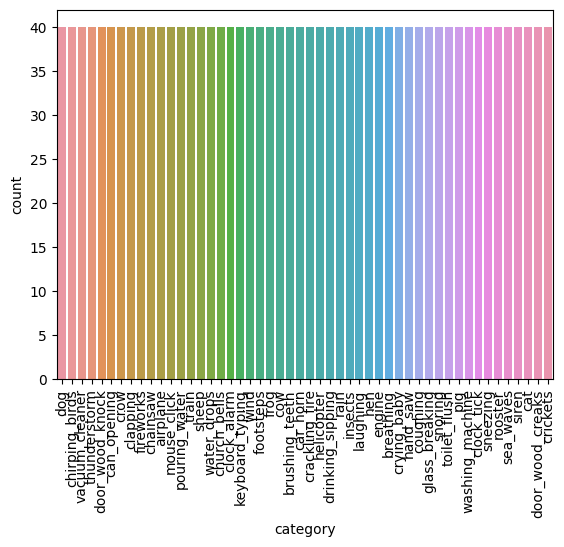

In [5]:

# Vẽ biểu đồ phân bố của các lớp âm thanh trong tập dữ liệu
sns.countplot(x='category', data=data)
plt.xticks(rotation=90)
plt.show()


biểu đồ hình cột thể hiện số lượng có trong mỗi class , dễ thấy các class đều có 1 số lượng  audio là bằng nhau nên dữ liệu đã cho sẽ tuân theo phân phối đều rời rạc

IndexError: index 10 is out of bounds for axis 0 with size 10

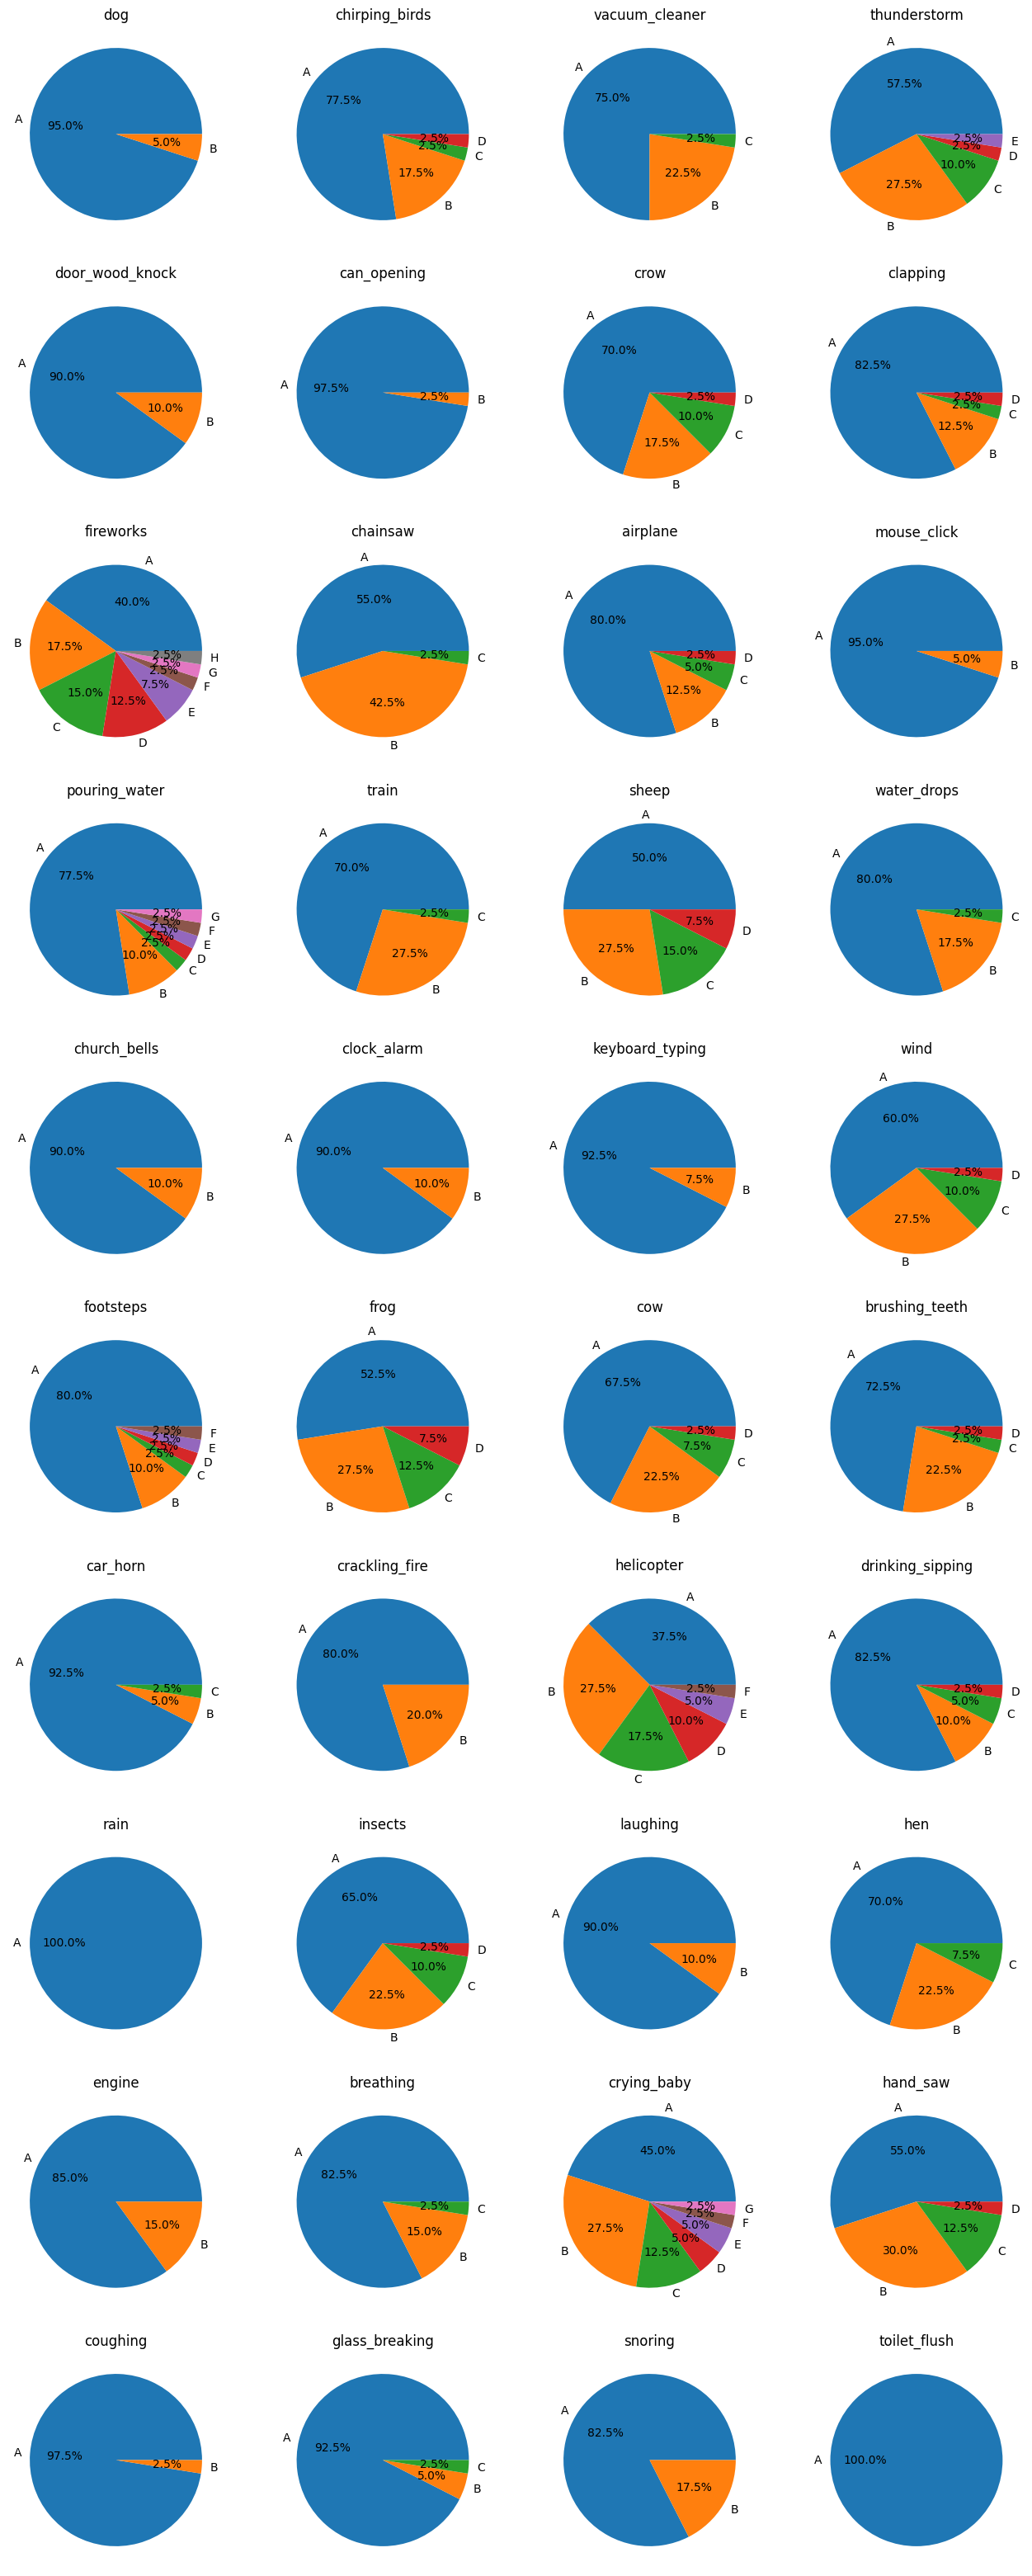

In [6]:
# Split sources
data['source'] = data['take'].apply(lambda x: x.split('-')[0])

# Compute percentage for each class and source
perc_data = pd.DataFrame(index=data['target'].unique(), columns=data['source'].unique())
for c in data['target'].unique():
    class_data = data[data['target'] == c]
    total_samples = len(class_data)
    for s in class_data['source'].unique():
        source_data = class_data[class_data['source'] == s]
        perc_data.at[c, s] = len(source_data) / total_samples

# Plot pie charts
fig, axs = plt.subplots(10, 4, figsize=(16, 40))
for i, c in enumerate(perc_data.index):
    row = i // 4
    col = i % 4
    # Get data for the class
    class_perc = perc_data.loc[c]
    class_perc = class_perc[class_perc > 0] # Exclude sources with 0 percentage
    # Plot pie chart
    axs[row, col].pie(class_perc.values, labels=class_perc.index, autopct='%1.1f%%')
    axs[row, col].set_title(f'{data.loc[data["target"] == c, "category"].values[0]}') # Set title to category name
# Add legend to the last subplot
axs[-1, -1].legend(class_perc.index, loc='center', bbox_to_anchor=(1.5, 0.5))
plt.tight_layout()
plt.show()




Biểu đồ hình tròn thể hiện mỗi lớp có bao nhiêu phần trăm là từ các nguồn khác nhau, lớp nào mà có tỷ lệ từ các nguồn càng đa dạng và đồng đều thì càng giúp mô hình huấn luyện tốt hơn, giảm tính thiên lệch trong  khi huấn luyện và tăng tính đại diện của lớp âm thanh đó

In [38]:
counts = data.groupby('fold')['target'].count().reset_index()
print(counts)


   fold  target
0     1     400
1     2     400
2     3     400
3     4     400
4     5     400


số lượng của mỗi mẫu trong esc50 là 400 audio 1 mẫu

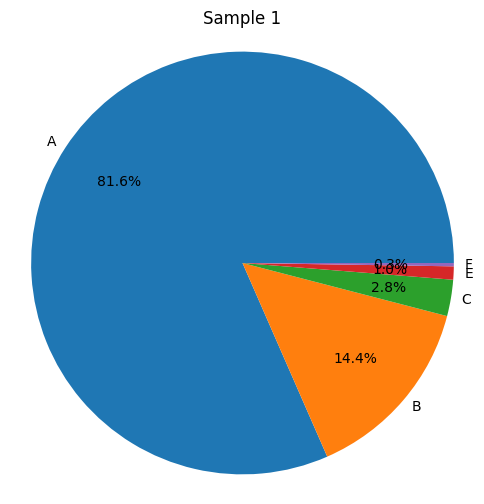

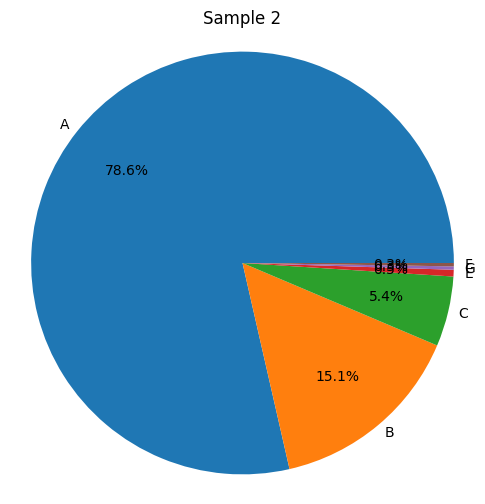

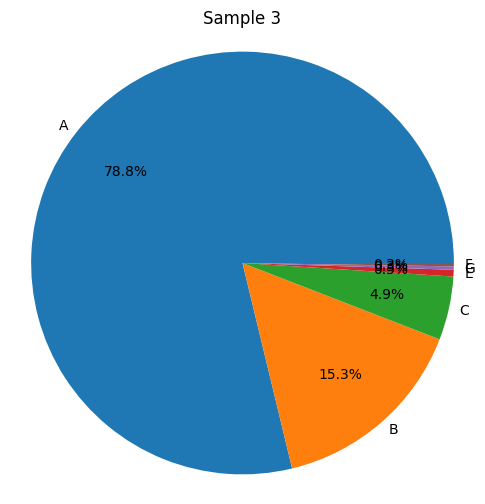

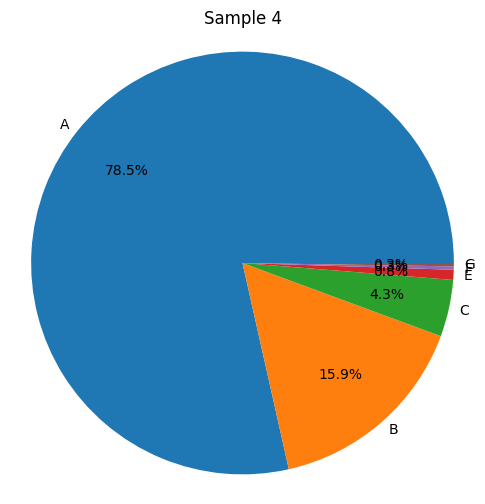

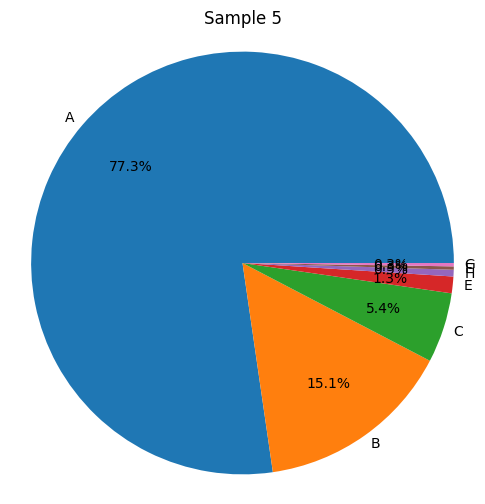

In [18]:

# Define sources to include in the pie chart
sources_to_include = ['A', 'B', 'C', 'E', 'F', 'H', 'G']

# Loop through each sample
for i in range(5):
    # Select the sample
    sample = data.sample(400)
    # Split sources
    sample['source'] = sample['take'].apply(lambda x: x.split('-')[0])
    # Filter sources to include in the pie chart
    sample = sample[sample['source'].isin(sources_to_include)]
    # Compute percentage for each source
    total_samples = len(sample)
    perc_data = sample['source'].value_counts(normalize=True)
    perc_data = perc_data[perc_data > 0] # Exclude sources with 0 percentage
    
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(perc_data.values, labels=perc_data.index, autopct='%1.1f%%', labeldistance=1.05, pctdistance=0.7)
    plt.title(f'Sample {i+1}')
    plt.axis('equal')
    plt.show()



Biểu đồ hình tròn thể hiện mỗi 1 mẫu có bao nhiêu phần trăm là từ các nguồn khác nhau, lớp nào mà có tỷ lệ từ các nguồn càng đa dạng và đồng đều thì càng giúp mô hình huấn luyện tốt hơn, giảm tính thiên lệch trong  khi huấn luyện và tăng tính đại diện của lớp âm thanh đó


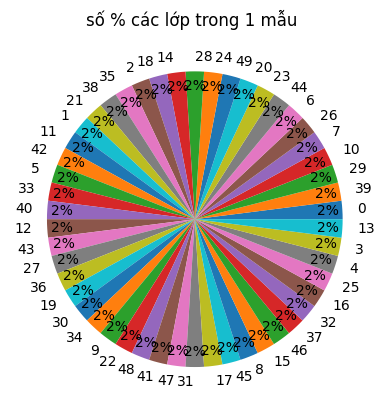

In [39]:

# Lọc các mẫu thuộc fold 1
fold_1 = data[data['fold'] == 1]

# Đếm số lượng các lớp âm thanh trong mẫu 1
counts = fold_1['target'].value_counts()

# Vẽ biểu đồ hình tròn
plt.pie(counts.values, labels=counts.index, autopct='%.0f%%',pctdistance=0.9)
plt.title('số % các lớp trong 1 mẫu ')
plt.show()


ta thấy các mẫu đầu có số lượng phần trăm các class là như nhau nên các mẫu đều tuân theo phân phối đều